In [2]:
import pandas as pd

file1_path = '/Users/arindamdutta/Downloads/C8_Input_Files/dim_customer.csv'
file2_path = '/Users/arindamdutta/Downloads/C8_Input_Files/fact_spends.csv'

# Importing CSV files into pandas DataFrames
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

In [3]:
print(df1.head())
print('-------------------------------------------------------------------------')
print("Shape is= ", df1.shape)

print(df2.head())
print('-------------------------------------------------------------------------')
print("Shape is= ", df2.shape)

  customer_id age_group       city                occupation gender  \
0  ATQCUS1825       45+  Bengaluru     Salaried IT Employees   Male   
1  ATQCUS0809     25-34  Hyderabad  Salaried Other Employees   Male   
2  ATQCUS0663     25-34    Chennai  Salaried Other Employees   Male   
3  ATQCUS0452     25-34  Delhi NCR      Government Employees   Male   
4  ATQCUS3350     21-24  Bengaluru               Freelancers   Male   

  marital status  avg_income  
0        Married       73523  
1        Married       39922  
2        Married       37702  
3        Married       54090  
4         Single       28376  
-------------------------------------------------------------------------
Shape is=  (4000, 7)
  customer_id      month           category payment_type  spend
0  ATQCUS1371       July  Health & Wellness  Credit Card   1114
1  ATQCUS0368    October          Groceries  Credit Card   1466
2  ATQCUS0595        May  Health & Wellness  Credit Card    387
3  ATQCUS0667    October        Elec

In [8]:
df1.columns 
 

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income'],
      dtype='object')

In [9]:
df2.columns

Index(['customer_id', 'month', 'category', 'payment_type', 'spend'], dtype='object')

In [10]:
#check the null values
df1.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [11]:
#check the null values
df2.isnull().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [12]:
#Checking the continuos and the Categorical Columns
df1.dtypes

customer_id       object
age_group         object
city              object
occupation        object
gender            object
marital status    object
avg_income         int64
dtype: object

In [13]:
#Checking the continuos and the Categorical Columns
df2.dtypes

customer_id     object
month           object
category        object
payment_type    object
spend            int64
dtype: object

In [14]:
#Checking if any duplicate row is there in the dataset
df1.duplicated().sum()

0

In [15]:
#Checking if any duplicate row is there in the dataset
df2.duplicated().sum()

0

Dataset 1:


,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376



Dataset 2:


,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


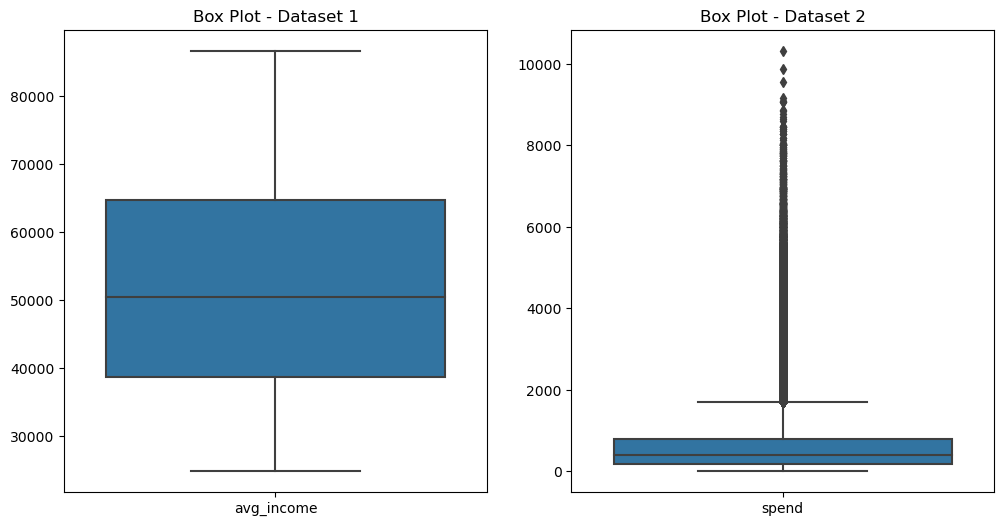

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('/Users/arindamdutta/Downloads/C8_Input_Files/dim_customer.csv')
df2 = pd.read_csv('/Users/arindamdutta/Downloads/C8_Input_Files/fact_spends.csv')

# Display the first few rows of each dataset to understand the structure
print("Dataset 1:")
display(df1.head())

print("\nDataset 2:")
display(df2.head())

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df1)
plt.title('Box Plot - Dataset 1')

plt.subplot(1, 2, 2)
sns.boxplot(data=df2)
plt.title('Box Plot - Dataset 2')

plt.show()

# Identify outliers using the Interquartile Range (IQR) method
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers

In [34]:
#What are the numbers of unique entries in the Categorical columns
for col in df1.columns:
    if df1[col].dtype=='object':
        print("Number of unique entries in",col + " are",df1[col].nunique())
        print("=================================================")

Number of unique entries in customer_id are 4000
Number of unique entries in age_group are 4
Number of unique entries in city are 5
Number of unique entries in occupation are 5
Number of unique entries in gender are 2
Number of unique entries in marital status are 2


In [35]:
#What are the numbers of unique entries in the Categorical columns
for col in df2.columns:
    if df2[col].dtype=='object':
        print("Number of unique entries in",col + " are",df2[col].nunique())
        print("=================================================")

Number of unique entries in customer_id are 4000
Number of unique entries in month are 6
Number of unique entries in category are 9
Number of unique entries in payment_type are 4


# Visualization to Explore and get insights

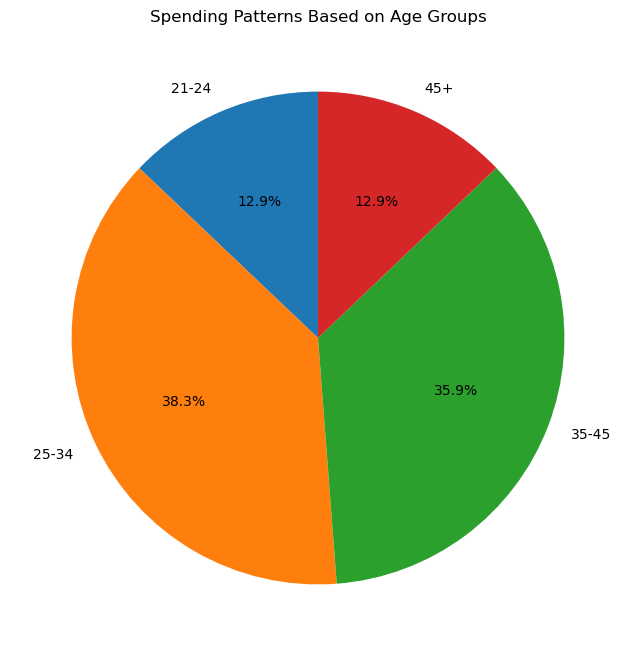

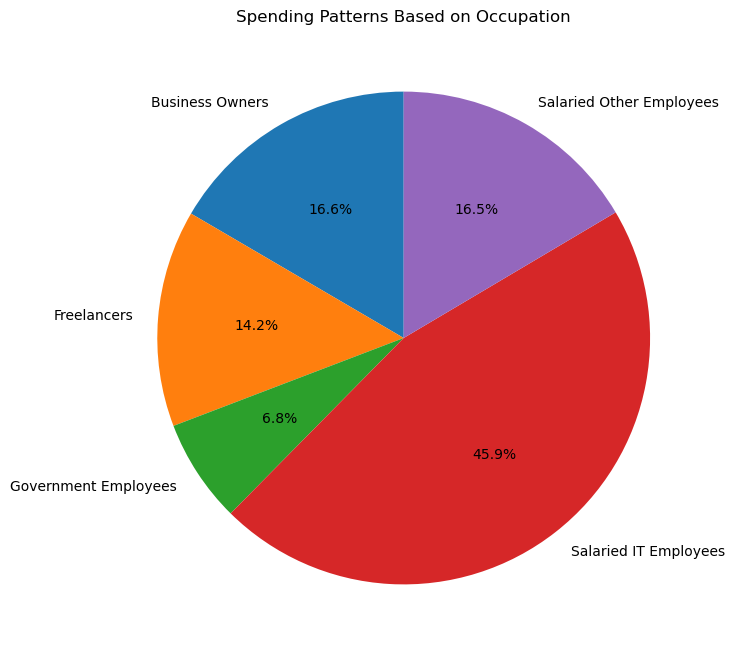

In [20]:
merged_df = pd.merge(df1,df2, on='customer_id')
segments = merged_df.groupby(['age_group', 'occupation'])['spend'].sum().reset_index()

# Create Pie Chart for age_group
plt.figure(figsize=(8, 8))
plt.pie(segments.groupby('age_group')['spend'].sum(), labels=segments['age_group'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Spending Patterns Based on Age Groups')
plt.show()

# Create Pie Chart for occupation
plt.figure(figsize=(8, 8))
plt.pie(segments.groupby('occupation')['spend'].sum(), labels=segments['occupation'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Spending Patterns Based on Occupation')
plt.show()

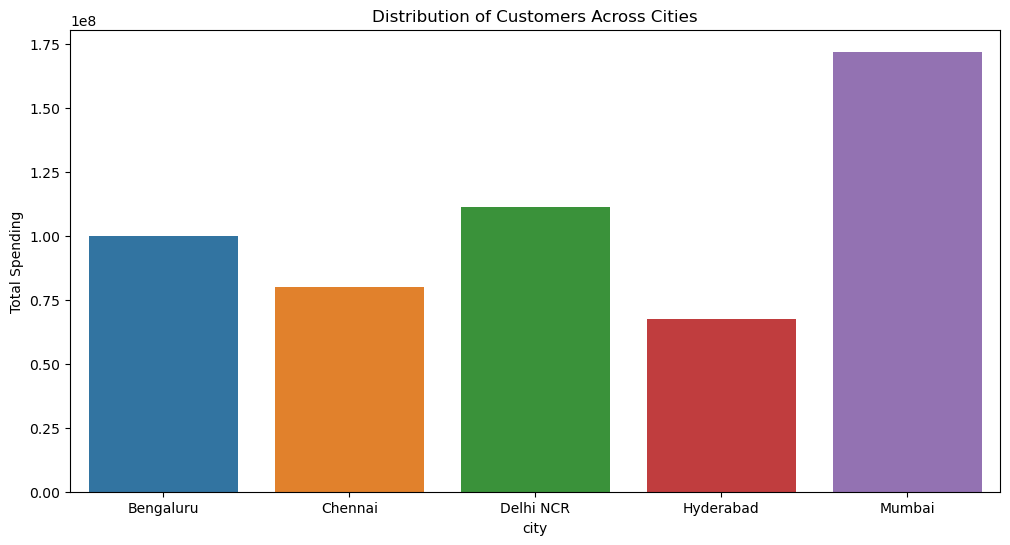

In [23]:
merged_df = pd.merge(df1,df2, on='customer_id')

city_segments = merged_df.groupby('city')['spend'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='spend', data=city_segments)
plt.title('Distribution of Customers Across Cities')
plt.xlabel('city')
plt.ylabel('Total Spending')
plt.show()

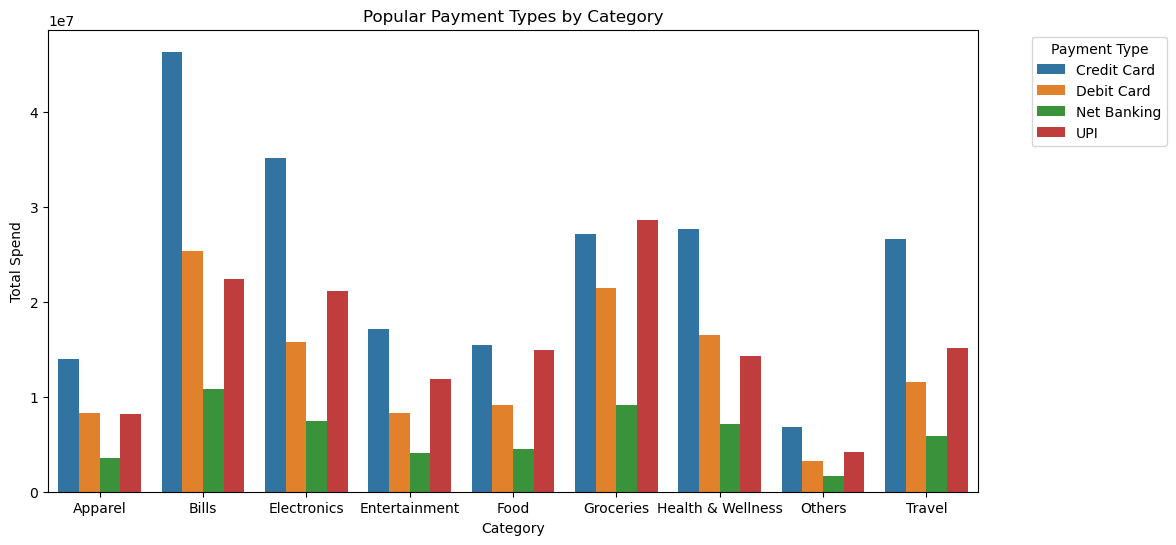

In [27]:
payment_category_spend = df2.groupby(['payment_type', 'category'])['spend'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='spend', hue='payment_type', data=payment_category_spend, errorbar=None)
plt.title('Popular Payment Types by Category')
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

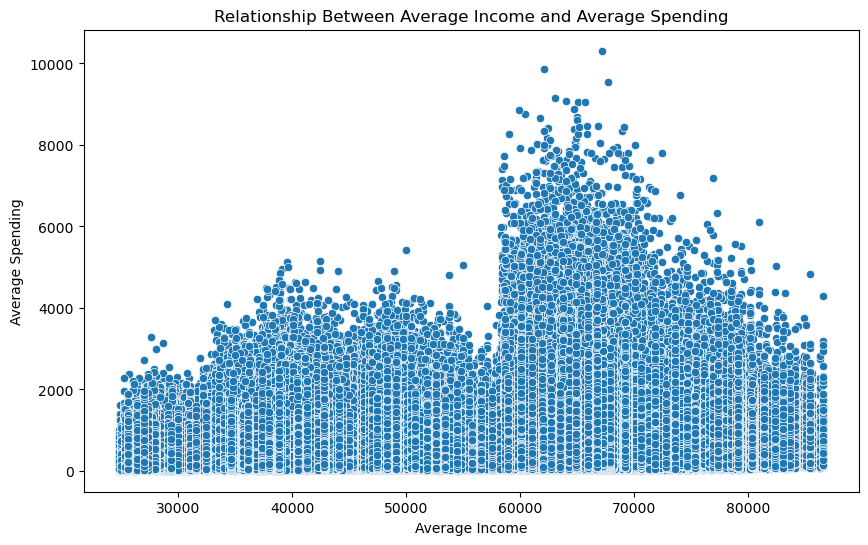

In [28]:
merged_df = pd.merge(df1, df2, on='customer_id')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_income', y='spend', data=merged_df)
plt.title('Relationship Between Average Income and Average Spending')
plt.xlabel('Average Income')
plt.ylabel('Average Spending')
plt.show()

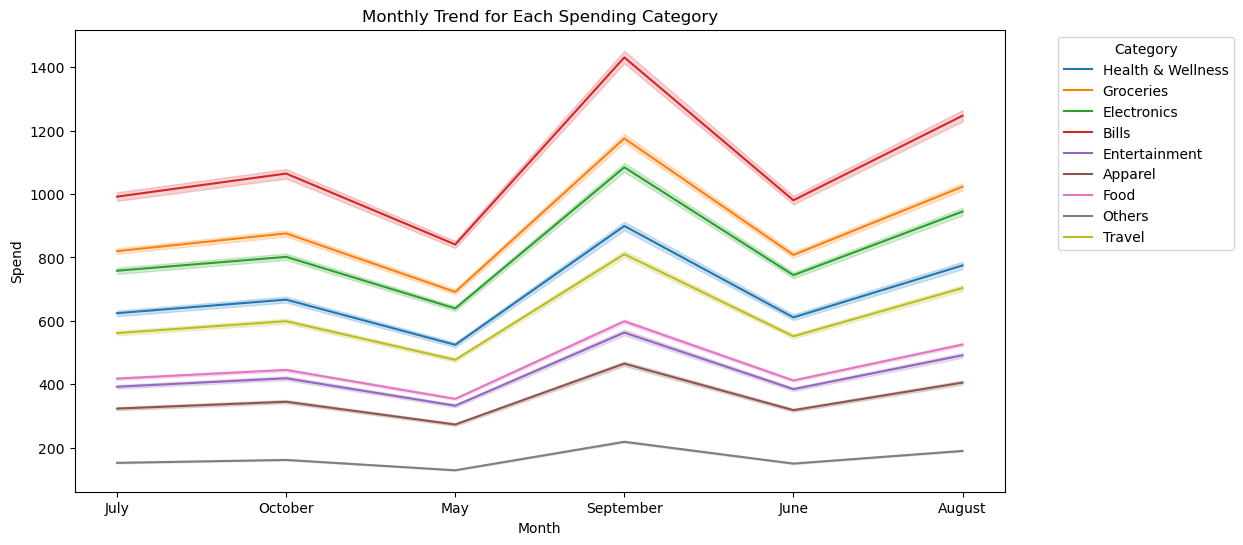

In [33]:
df2 = pd.read_csv(file2_path)

# Line chart for monthly trend in each spending category
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='spend', hue='category', data=df2)
plt.title('Monthly Trend for Each Spending Category')
plt.xlabel('Month')
plt.ylabel('Spend')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

